# Identifying Dominant Features for Sales

## Import the clean data

In [1]:
import pandas as pd

chunk = pd.read_csv('./temp/cleaned_data.csv', chunksize=1000000, low_memory=False)
df = pd.concat(chunk)

df.head()

,back_legroom,body_type,daysonmarket,engine_type,exterior_color,damage_history,front_legroom,fuel_tank_volume,fuel_type,height,...,torque,transmission,wheel_system,wheelbase,width,year,has_picture,has_description,combined_fuel_economy,major_options_count
0,35.099998,SUV / Crossover,522,I4,Yellow,False,41.2,12.7,Gasoline,66.5,...,200.0,A,FWD,101.2,79.6,2019,True,True,26.08327,1.000000
1,38.099998,SUV / Crossover,207,I4,Black,False,39.1,17.7,Gasoline,68.0,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
2,37.599998,SUV / Crossover,196,V6,Gray,False,39.0,23.5,Gasoline,73.0,...,332.0,A,AWD,115.0,87.4,2020,True,True,26.08327,6.161011
3,38.099998,SUV / Crossover,137,I4,Black,False,39.1,17.7,Gasoline,68.0,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
4,37.099998,SUV / Crossover,242,I4,Other Color,False,40.2,16.6,Gasoline,66.3,...,269.0,A,AWD,113.1,84.4,2020,True,True,26.08327,8.000000


## Remove outliers

Outlier removal is a data preprocessing step that should be carefully considered based on the nature of dataset and the goals of analysis. In this case, I ended up removing outliers from only two columns:

- Outliers in the 'price' column could represent extremely expensive or inexpensive vehicles. Now we want to focus on the bulk of the market.
- Extremely high or low mileage values could represent exceptional cases.
- Also old cars are dropped from the data.
- Savings amount is dropped because there is no information what it is.
- The model names are removed because we are only looking at data by car brand.

In [2]:
import numpy as np
from scipy import stats

df = df[np.abs(stats.zscore(df['price'])) < 3]
df = df[np.abs(stats.zscore(df['daysonmarket'])) < 3]
df = df[np.abs(stats.zscore(df['torque'])) < 3]
df = df[np.abs(stats.zscore(df['mileage'])) < 3]

# Drop vintage cars
old_cars = df[(df['year'] < 1960)].index
df = df.drop(old_cars)

# Drop savings amount and models
df = df.drop(['savings_amount', 'model_name'], axis=1)

print(df.shape)
df.head()

(2517993, 28)


,back_legroom,body_type,daysonmarket,engine_type,exterior_color,damage_history,front_legroom,fuel_tank_volume,fuel_type,height,...,torque,transmission,wheel_system,wheelbase,width,year,has_picture,has_description,combined_fuel_economy,major_options_count
1,38.099998,SUV / Crossover,207,I4,Black,False,39.1,17.7,Gasoline,68.0,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
2,37.599998,SUV / Crossover,196,V6,Gray,False,39.0,23.5,Gasoline,73.0,...,332.0,A,AWD,115.0,87.4,2020,True,True,26.08327,6.161011
3,38.099998,SUV / Crossover,137,I4,Black,False,39.1,17.7,Gasoline,68.0,...,269.0,A,AWD,107.9,85.6,2020,True,True,26.08327,1.000000
4,37.099998,SUV / Crossover,242,I4,Other Color,False,40.2,16.6,Gasoline,66.3,...,269.0,A,AWD,113.1,84.4,2020,True,True,26.08327,8.000000
6,37.099998,SUV / Crossover,70,I4,White,False,40.2,16.6,Gasoline,66.3,...,269.0,A,AWD,113.1,84.4,2020,True,True,26.08327,1.000000


## Days on market

In this chapter are visualizations comparing all cars to fast-selling cars based on various factors such as body type, exterior color, whether the car is new or used, manufacturing year, mileage groups, and price. Plotly is used for the visualizations. First, we create a new dataframe df_fast, which contains information only about those cars that have been sold faster than 30 days.

In [3]:
x = df[(df['daysonmarket'] > 30)].index
df_fast = df.drop(x)
df_fast.shape

(1157457, 28)

In [4]:
df_body = df.groupby('body_type')['daysonmarket'].mean().sort_values()
df_body_fast = df_fast.groupby('body_type')['daysonmarket'].mean().sort_values()

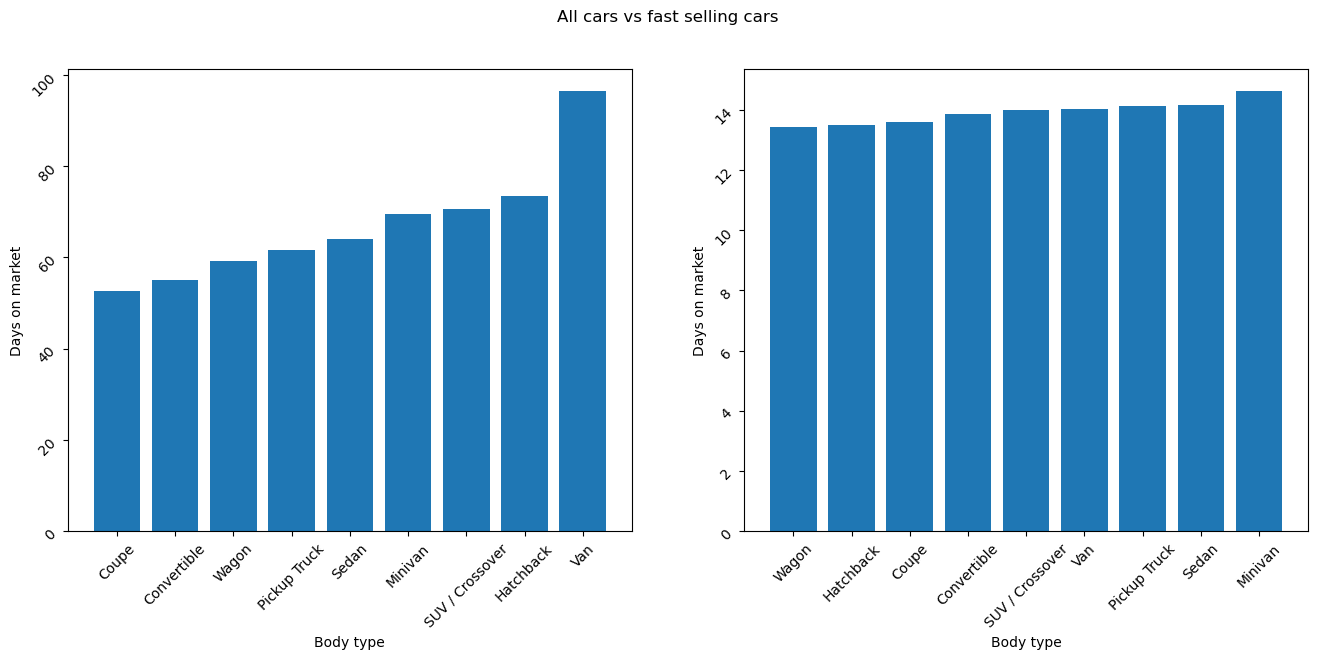

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Body type')
ax1.set_ylabel('Days on market')
ax2.set_xlabel('Body type')
ax2.set_ylabel('Days on market')

ax1.bar(df_body.index, df_body.values)
ax2.bar(df_body_fast.index, df_body_fast.values)

ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)

It can be seen from the picture that coupe model cars usually sell best. In fast-selling cars, however, the Wagon model sells the fastest. The biggest difference is the Hatchback model car, which is the second slowest selling of all cars, but the second fastest selling among fast selling cars.

In [6]:
df_color = df.groupby('exterior_color')['daysonmarket'].mean().sort_values()
df_color_fast = df_fast.groupby('exterior_color')['daysonmarket'].mean().sort_values()

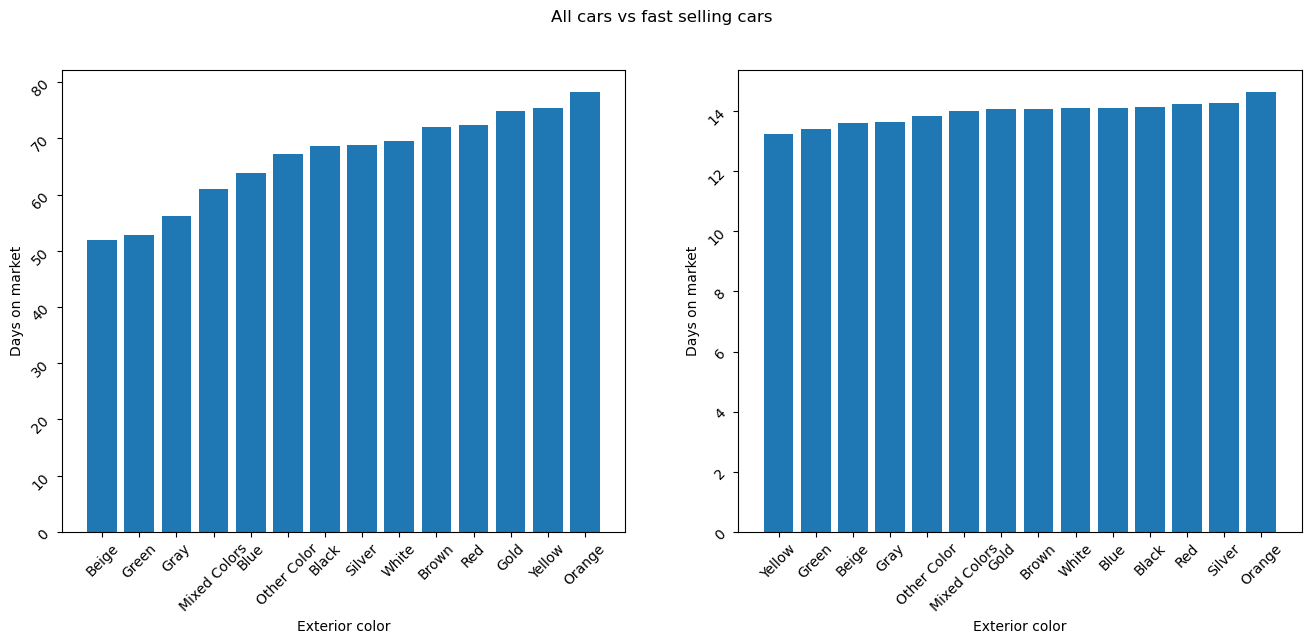

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Exterior color')
ax1.set_ylabel('Days on market')
ax2.set_xlabel('Exterior color')
ax2.set_ylabel('Days on market')

ax1.bar(df_color.index, df_color.values)
ax2.bar(df_color_fast.index, df_color_fast.values)

ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)

The effect of the exterior color on the selling time of the car. Of all cars, beige cars sell the fastest. Of the fast-selling cars, yellow cars sell the fastest.

In [8]:
df_new = df.groupby('is_new')['daysonmarket'].mean().sort_values()
df_new_fast = df_fast.groupby('is_new')['daysonmarket'].mean().sort_values()

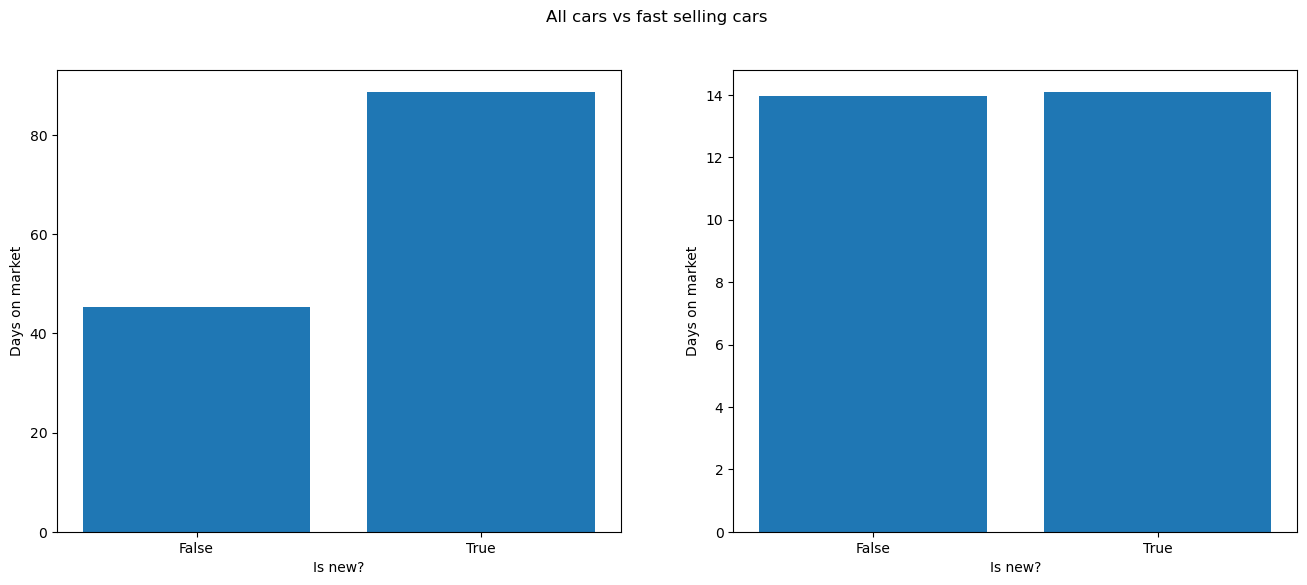

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Is new?')
ax1.set_ylabel('Days on market')
ax2.set_xlabel('Is new?')
ax2.set_ylabel('Days on market')

ax1.bar(df_new.index, df_new.values)

# Set x-axis tick labels for ax1
ax1.set_xticks(df_new.index)
ax1.set_xticklabels(['True' if val else 'False' for val in df_new.index])

ax2.bar(df_new_fast.index, df_new_fast.values)

# Set x-axis tick labels for ax2
ax2.set_xticks(df_new_fast.index)
ax2.set_xticklabels(['True' if val else 'False' for val in df_new_fast.index])

plt.show()

In [10]:
df_year = df.groupby('year')['daysonmarket'].mean().sort_values()
df_year_fast = df_fast.groupby('year')['daysonmarket'].mean().sort_values()

<BarContainer object of 62 artists>

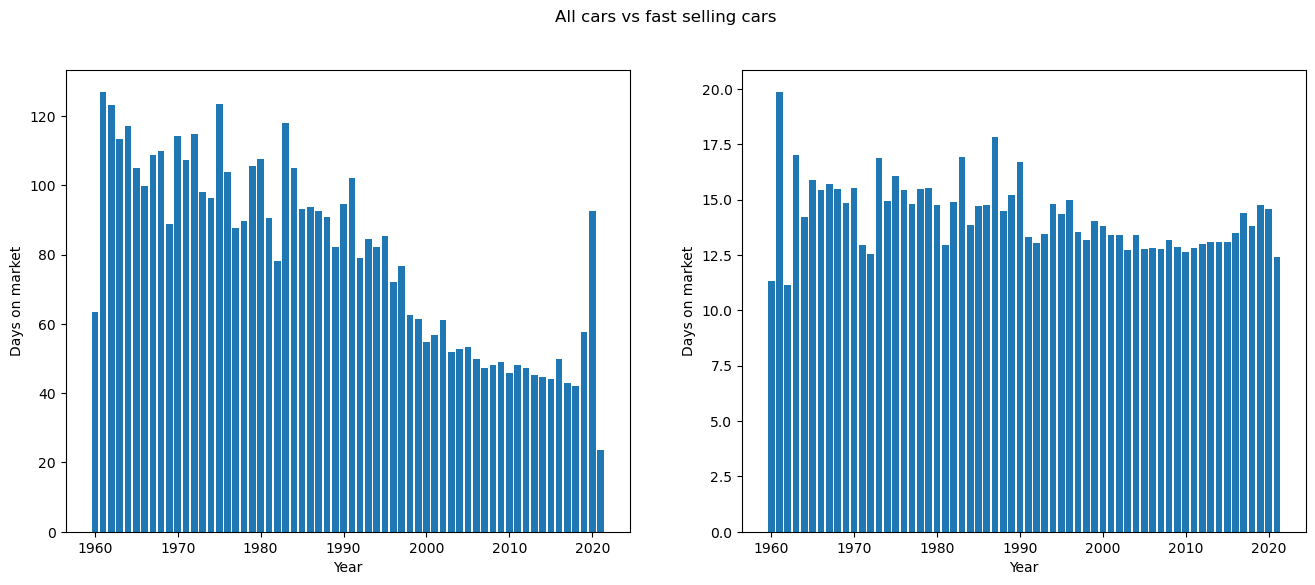

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Year')
ax1.set_ylabel('Days on market')
ax2.set_xlabel('Year')
ax2.set_ylabel('Days on market')

ax1.bar(df_year.index, df_year.values)
ax2.bar(df_year_fast.index, df_year_fast.values)

The same trend can be seen in fast selling and all cars; older cars sell more slowly, while new ones sell faster.

In [12]:
# Define the thresholds for the mileage groups
thresholds = [0, 10000, 30000, 60000, 90000, 109146]

# Define the labels for the mileage groups
labels = ['very low', 'low', 'medium', 'high', 'very high']

# Create a new column 'mileage_group' based on the 'mileage' values
df['mileage_group'] = pd.cut(df['mileage'], bins=thresholds, labels=labels)
df_fast['mileage_group'] = pd.cut(df_fast['mileage'], bins=thresholds, labels=labels)

df_mileage = df.groupby('mileage_group')['daysonmarket'].mean()
df_mileage_fast = df_fast.groupby('mileage_group')['daysonmarket'].mean()

<BarContainer object of 5 artists>

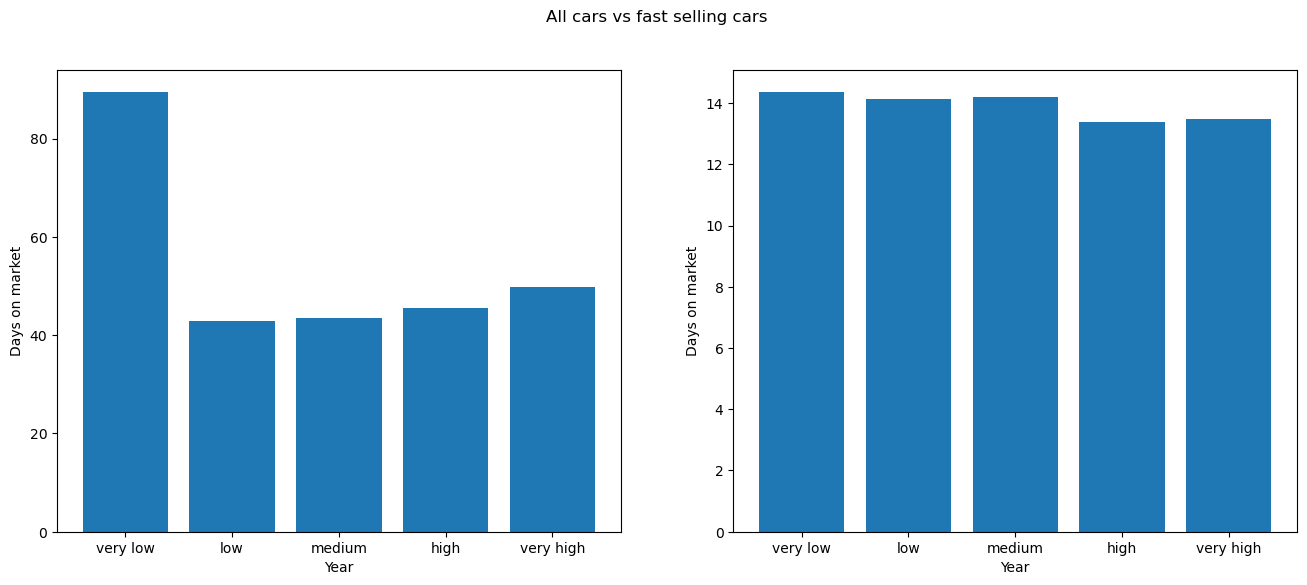

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Year')
ax1.set_ylabel('Days on market')
ax2.set_xlabel('Year')
ax2.set_ylabel('Days on market')

ax1.bar(df_mileage.index, df_mileage.values)
ax2.bar(df_mileage_fast.index, df_mileage_fast.values)

Cars with very low mileage are sold more slowly than others. This may be because a car with low mileage may be new and therefore more expensive.

In [14]:
df_price = df.groupby('daysonmarket')['price'].mean().sort_values()
df_price_fast = df_fast.groupby('daysonmarket')['price'].mean().sort_values()

<BarContainer object of 31 artists>

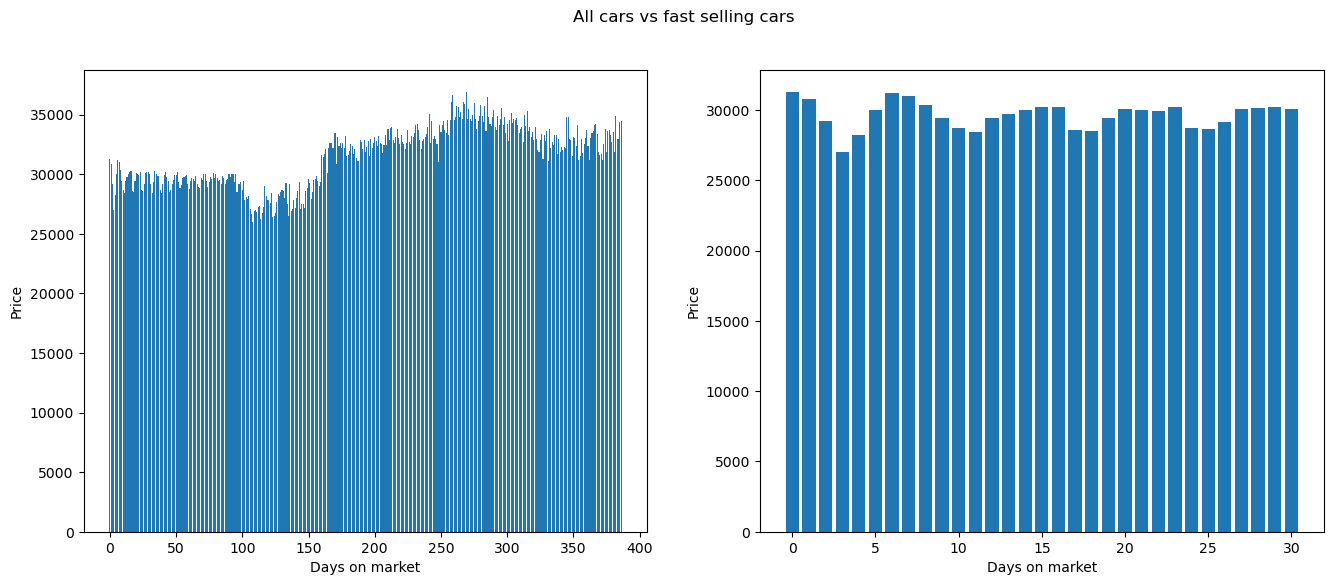

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs fast selling cars')

ax1.set_xlabel('Days on market')
ax1.set_ylabel('Price')
ax2.set_xlabel('Days on market')
ax2.set_ylabel('Price')

ax1.bar(df_price.index, df_price.values)
ax2.bar(df_price_fast.index, df_price_fast.values)

The graph above shows that the more expensive a car is, the slower it sells, if you look at all the cars. No similar trend can be interpreted in fast-selling cars.

## Price

Below is visualized the relationship between all cars and fast-selling cars based on price, considering factors such as torque, manufacturing year, mileage, and horsepower.

In [16]:
x2 = df[(df['price'] < 50000)].index
df_exp = df.drop(x2)
df_exp.shape

(240642, 29)

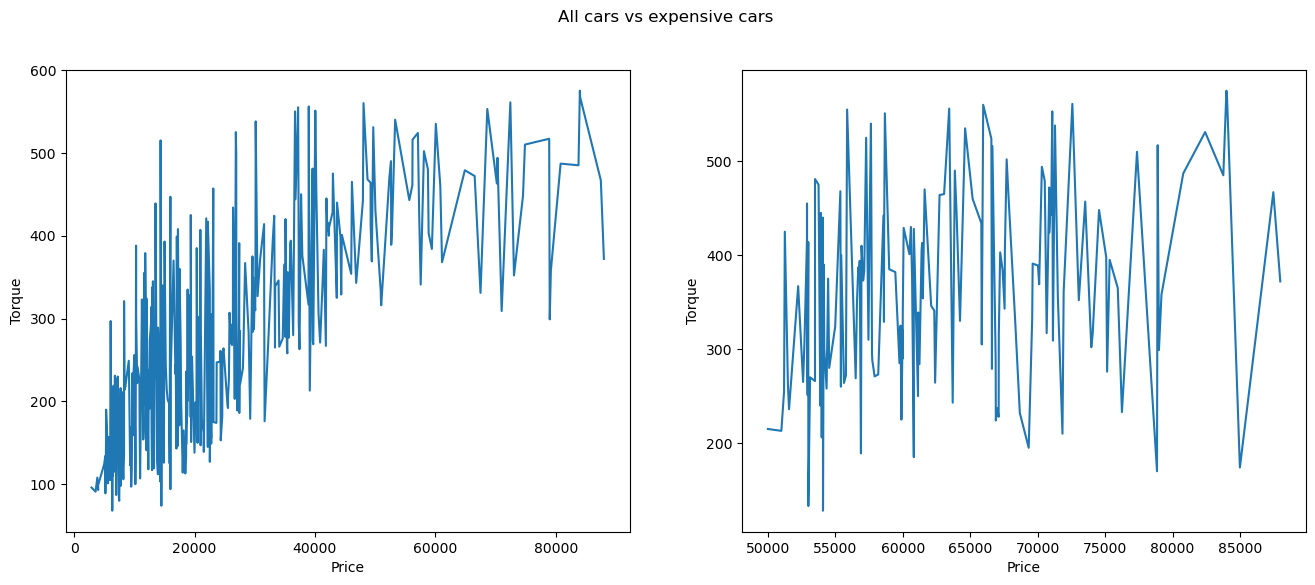

In [17]:
import matplotlib.pyplot as plt

df_torque = df.groupby('torque')['price'].mean().sort_values()
df_torque_exp = df_exp.groupby('torque')['price'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs expensive cars')

ax1.set_xlabel('Price')
ax1.set_ylabel('Torque')
ax2.set_xlabel('Price')
ax2.set_ylabel('Torque')

ax1.plot(df_torque.values, df_torque.index)
ax2.plot(df_torque_exp.values, df_torque_exp.index)

The graph shows that the higher the torque, the more expensive the car. When examining only expensive cars, a similar alignment cannot be made.

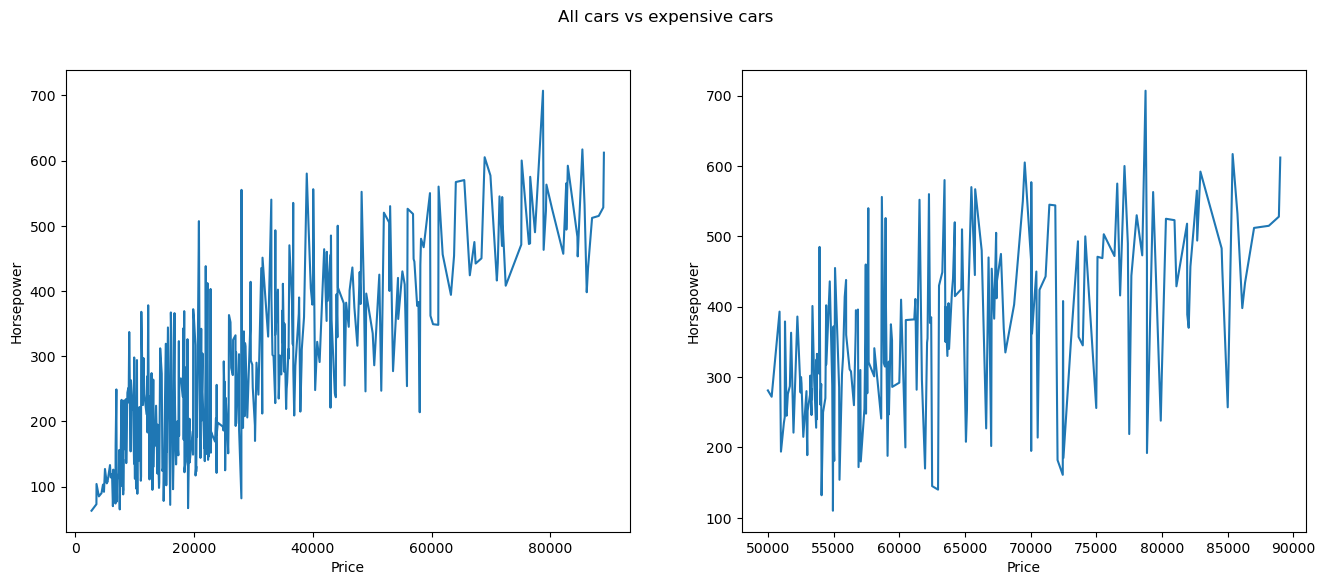

In [18]:
df_horsepower = df.groupby('horsepower')['price'].mean().sort_values()
df_horsepower_exp = df_exp.groupby('horsepower')['price'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs expensive cars')

ax1.set_xlabel('Price')
ax1.set_ylabel('Horsepower')
ax2.set_xlabel('Price')
ax2.set_ylabel('Horsepower')

ax1.plot(df_horsepower.values, df_horsepower.index)
ax2.plot(df_horsepower_exp.values, df_horsepower_exp.index)

Horsepower also affects the price of the car in the same way as torque. Even in expensive cars, it can be seen that when the horsepower increases, the price also increases.

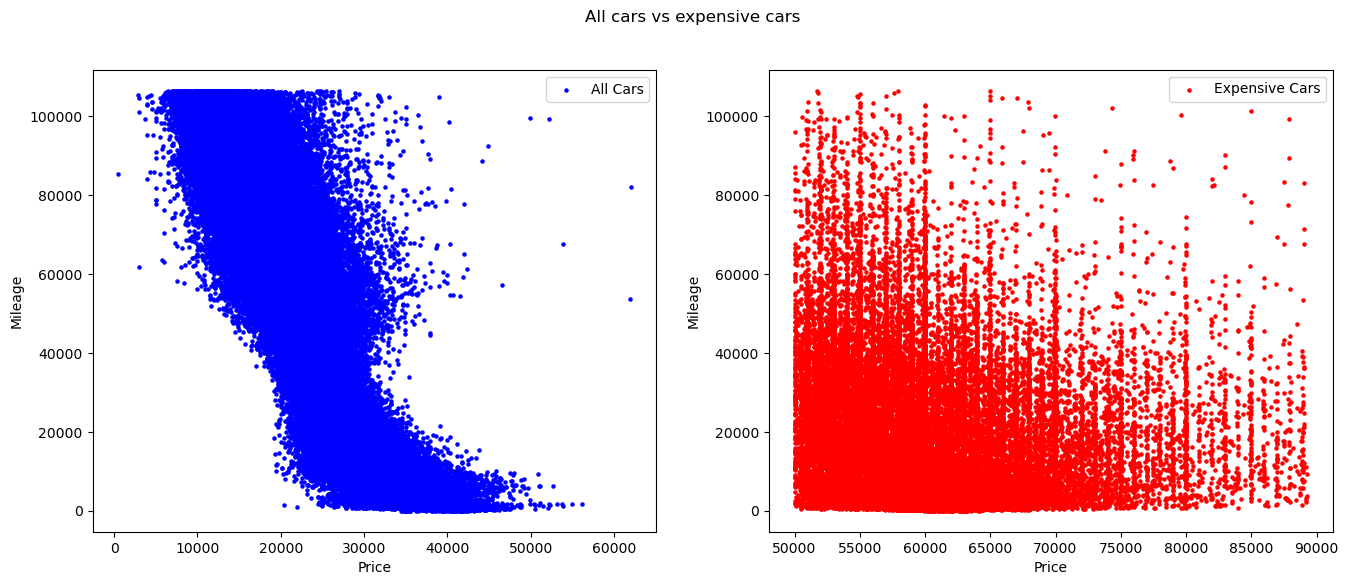

In [19]:
df_mileage = df.groupby('mileage')['price'].mean().sort_values()
df_mileage_exp = df_exp.groupby('mileage')['price'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs expensive cars')

ax1.set_xlabel('Price')
ax1.set_ylabel('Mileage')
ax2.set_xlabel('Price')
ax2.set_ylabel('Mileage')

# Use scatter plot instead of line plot
ax1.scatter(df_mileage.values, df_mileage.index, color='blue', label='All Cars', s=5)
ax2.scatter(df_mileage_exp.values, df_mileage_exp.index, color='red', label='Expensive Cars', s=5)

# Add legend
ax1.legend()
ax2.legend()

plt.show()

When looking at all the cars, it is noticed that the price is the lowest with high mileage, and vice versa. When examining expensive cars, the same trend is noticed.

<BarContainer object of 60 artists>

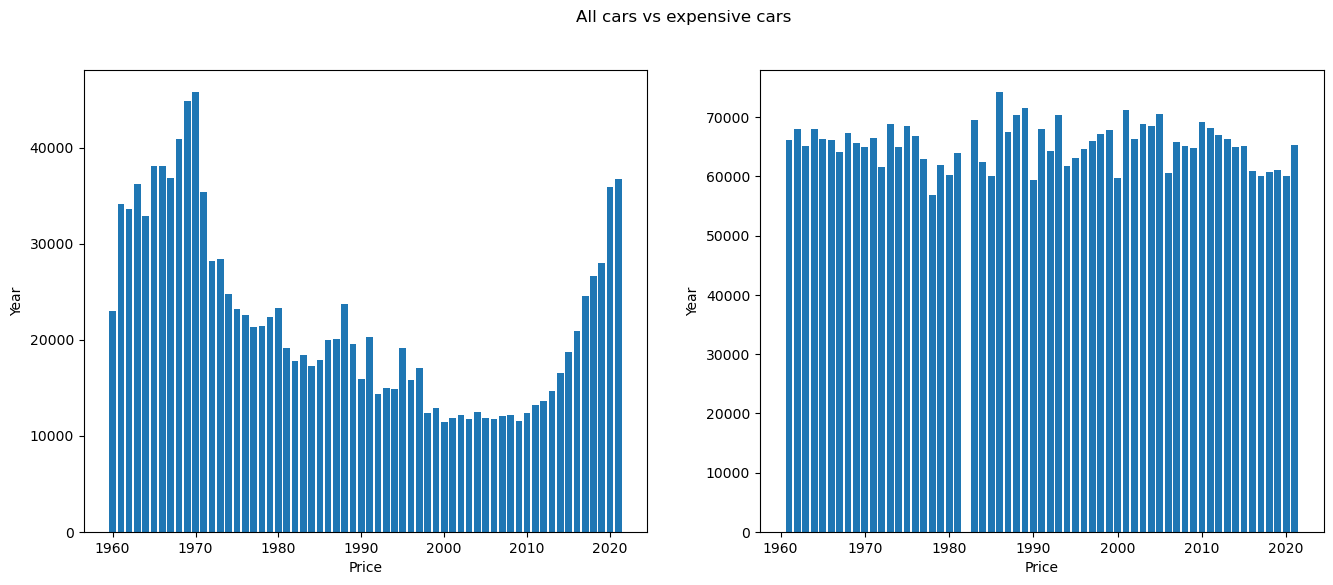

In [26]:
df_year = df.groupby('year')['price'].mean().sort_values()
df_year_exp = df_exp.groupby('year')['price'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs expensive cars')

ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax2.set_xlabel('Price')
ax2.set_ylabel('Year')

ax1.bar(df_year.index, df_year.values)
ax2.bar(df_year_exp.index, df_year_exp.values)

All authentic ones, considering the more expensive cars, are really new and really old (year less than 1972). Cars from 1998 to 2011 are the cheapest. In the most expensive cars, the price varies randomly between years.

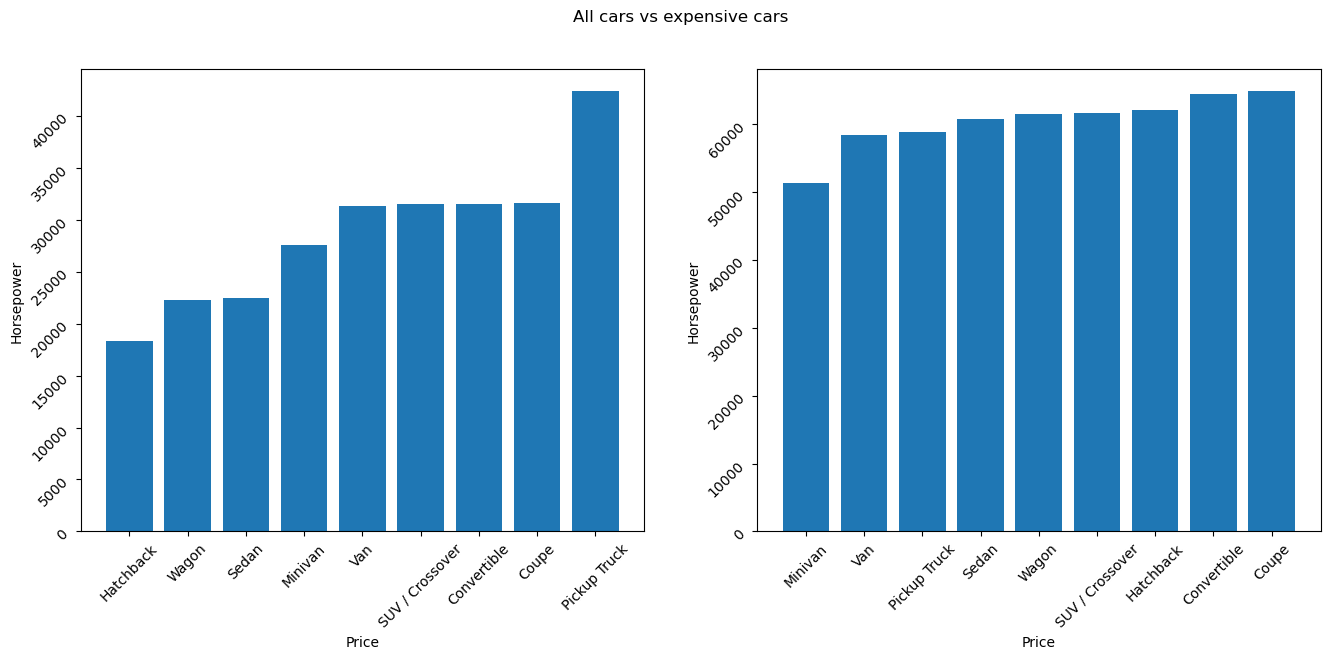

In [23]:
df_bodytype = df.groupby('body_type')['price'].mean().sort_values()
df_bodytype_exp = df_exp.groupby('body_type')['price'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All cars vs expensive cars')

ax1.set_xlabel('Price')
ax1.set_ylabel('Horsepower')
ax2.set_xlabel('Price')
ax2.set_ylabel('Horsepower')

ax1.bar(df_bodytype.index, df_bodytype.values)
ax2.bar(df_bodytype_exp.index, df_bodytype_exp.values)

ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)

Of all cars, Hatchback models are the cheapest and Pickup Truck models are the most expensive. Among the fast-selling cars, Minivan models are the cheapest and Coupe models are more expensive.

## Values to numeric

In machine learning, data is typically represented as numerical values because many machine learning algorithms are based on mathematical and statistical operations that require numeric inputs. The goal here is to transform the data into a format that is suitable for the machine learning algorithms and other tasks.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517993 entries, 1 to 2625909
Data columns (total 29 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   back_legroom           float64 
 1   body_type              object  
 2   daysonmarket           int64   
 3   engine_type            object  
 4   exterior_color         object  
 5   damage_history         bool    
 6   front_legroom          float64 
 7   fuel_tank_volume       float64 
 8   fuel_type              object  
 9   height                 float64 
 10  horsepower             float64 
 11  interior_color         object  
 12  is_new                 bool    
 13  length                 float64 
 14  make_name              object  
 15  maximum_seating        int64   
 16  mileage                float64 
 17  price                  float64 
 18  torque                 float64 
 19  transmission           object  
 20  wheel_system           object  
 21  wheelbase              float64 

Columns that need to be changed are: body_type, engine_type, exterior_color, fuel_type, interior_color, make_name, transmission and wheel_system.

In [24]:
# Convert Series of strings to dummy codes
df_dummy = pd.get_dummies(df_fast)

## Scaling & correlations

This part is preparing and analyzing data for a machine learning task, specifically looking at the correlation between features and two target variables ('daysonmarket' and 'price'). The goal is feature selection based on correlation strength.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

scaler = MinMaxScaler()

# Scale the dummy dataframe
scaled_df = pd.DataFrame(scaler.fit_transform(df_dummy))
scaled_df.columns = df_dummy.columns

In [26]:
scaled_df = scaled_df.sample(frac=1)

# Calculate correlation coefficients between features and 'daysonmarket'
days_corr = scaled_df.corr(method='pearson')['daysonmarket']
# Sort the correlations in descending order to identify the most positively and negatively correlated features
sorted_corrs = days_corr.abs().sort_values(ascending=False).head(11)

# Same for 'price'
price_corr = scaled_df.corr(method='spearman')['price']
sorted_corrs_price = price_corr.abs().sort_values(ascending=False).head(11)

# Print the sorted correlations
print(sorted_corrs, '\n')
print(sorted_corrs_price)

daysonmarket                  1.000000
has_picture                   0.183074
interior_color_Other Color    0.051399
damage_history                0.038587
major_options_count           0.037737
interior_color_Black          0.035041
make_name_Toyota              0.034730
mileage_group_very low        0.030199
width                         0.030074
year                          0.026078
mileage_group_high            0.025035
Name: daysonmarket, dtype: float64 

price               1.000000
torque              0.600260
horsepower          0.590266
mileage             0.562282
year                0.561330
fuel_tank_volume    0.543498
wheelbase           0.537361
height              0.513169
length              0.507071
is_new              0.489598
width               0.484301
Name: price, dtype: float64


## Visualizations of Correlations

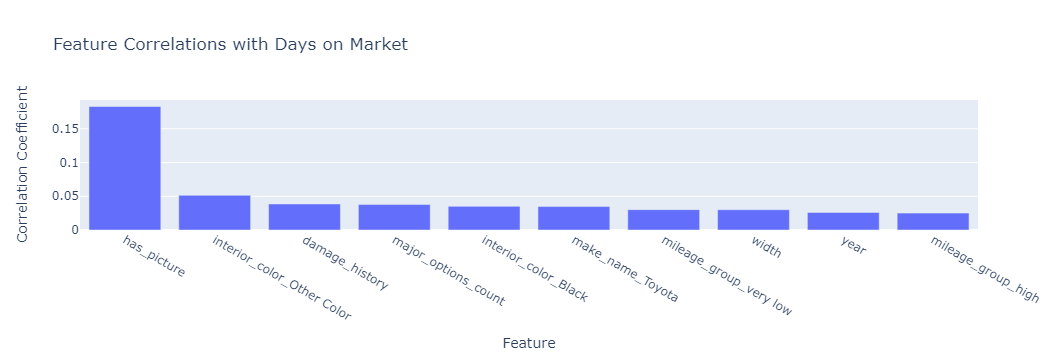

In [27]:
import plotly.express as px

top = sorted_corrs[1:]

fig = px.bar(top,
             x=top.index,
             y=top.values,
             title='Feature Correlations with Days on Market')

fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 0.05
    ),
    xaxis_title="Feature",
    yaxis_title="Correlation Coefficient"
)


fig.show()

There would seem to be strong correlations for sales time really badly. The only value that is highlighted is 'has_picture', which tells whether there is a picture of the car in the sale announcement or not. Even that correlation remains really weak. We tried to improve the results in many ways, but despite all the efforts, the results only got worse. Another method could have been used here to get better results on what affects the car's sales time.

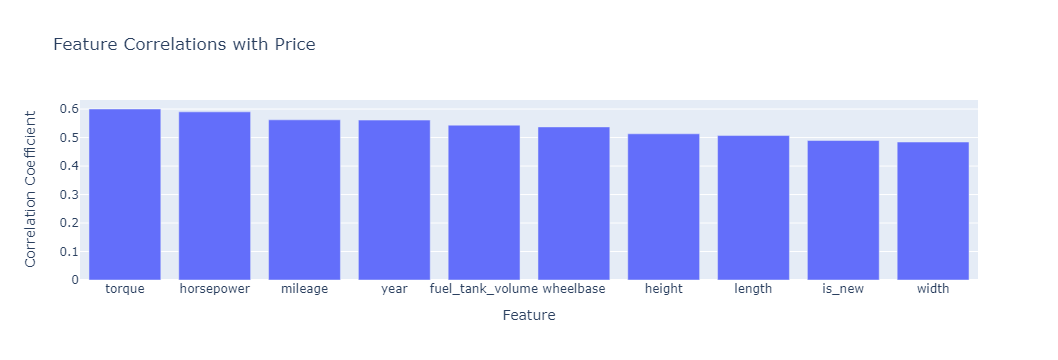

In [28]:
top_price = sorted_corrs_price[1:]

fig = px.bar(top_price, 
             x=top_price.index, 
             y=top_price.values, 
             title='Feature Correlations with Price')

fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 0.1
    ),
    xaxis_title="Feature",
    yaxis_title="Correlation Coefficient"
)

fig.show()

Unlike selling time, price seems to have a lot of columns that correlate with it. Columns torque, horsepower, mileage, year, fuel tank volume, wheekbase, height and length seems to have strong correlation with price.

**Torque and Horsepower**: These are key indicators of the engine's power and performance. Cars with higher torque and horsepower values often provide better acceleration and overall performance, which can increase their market value.

**Mileage**: Generally, lower mileage suggests less wear and tear on the car, indicating a potentially longer lifespan. Cars with lower mileage are often perceived as more reliable and can command higher prices in the used car market.

**Year**: The model year of a car is crucial because newer cars often come with updated features, technology, and safety enhancements. Newer models can be perceived as more valuable and may have a higher market value compared to older ones.

**Fuel Tank Volume**: The fuel efficiency of a car is an important consideration for buyers. Cars with larger fuel tank volumes may have longer ranges between refueling, which can be an attractive feature and positively influence the price.

**Wheelbase, Height, and Length**: These dimensions contribute to the overall size and design of the car. Larger cars, especially those with more interior space, may be considered more comfortable and desirable, leading to higher prices.